In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [2]:
#system
from __future__ import division
import sys

#numpy
import numpy as np

import h5py

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline

#astropy
from astropy.wcs import WCS
from astropy.io import fits
import astropy.units as u
import astropy.constants as const

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [4]:

fig_path = path_to_beads + 'Figures/paper/'

In [5]:
prefix = ''.join((path_to_beads, 'Analysis/gmosBeads/reduced/SDSSJ1531+3414'))

In [6]:
cz = const.c.to(u.km/u.s) * 0.335

stellar_hdu = fits.open(f'{prefix}.stellar_table.fits')

stellar_tab = stellar_hdu[1].data
stellar_columns = stellar_hdu[1].header

stellar_x_cor = stellar_tab.field('x_cor')
stellar_y_cor = stellar_tab.field('y_cor')


stellar_vel = stellar_tab.field('vel_fit')
#stellar_vel_err = stellar_tab.field('Halpstellar_vel_err')
stellar_disp = stellar_tab.field('disp_fit')

dim = (31,20)

stellar_vel_map = np.full((dim[0],dim[1]) ,np.nan)
stellar_disp_map = np.full((dim[0],dim[1]) ,np.nan)
# gas_select = (stellar_vel / stellar_vel_err) > 3.0

stellar_vel_map[stellar_y_cor,stellar_x_cor] = stellar_vel
stellar_disp_map[stellar_y_cor,stellar_x_cor] = stellar_disp

In [21]:
0.335 * const.c.to(u.km/u.s).value

100430.47343

In [7]:
np.nanmedian(stellar_vel_map) - 0.335 * const.c.to(u.km/u.s).value

333.8937575000018

In [11]:
np.nanmedian(stellar_disp_map)

357.01739501953125

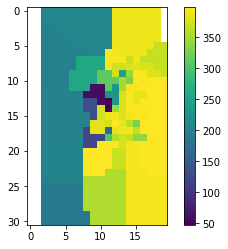

In [10]:
plt.imshow(stellar_disp_map)
plt.colorbar()

In [13]:
eline_hdu = fits.open(f'{prefix}.eline_table.fits')

eline_tab = eline_hdu[1].data
eline_columns = eline_hdu[1].header

eline_x_cor = eline_tab.field('x_cor')
eline_y_cor = eline_tab.field('y_cor')


Ha_flux = eline_tab.field('Halpha_flux')
#Ha_flux_err = eline_tab.field('Halpha_flux_err')
Ha_vel = eline_tab.field('Halpha_vel')
Ha_fwhm = eline_tab.field('Halpha_fwhm')

dim = (31,20)

Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_vel_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_fwhm_map = np.full((dim[0],dim[1]) ,np.nan)
# gas_select = (Ha_flux / Ha_flux_err) > 3.0

Ha_flux_map[eline_y_cor,eline_x_cor] = Ha_flux
Ha_vel_map[eline_y_cor,eline_x_cor] = Ha_vel
Ha_fwhm_map[eline_y_cor,eline_x_cor] = Ha_fwhm

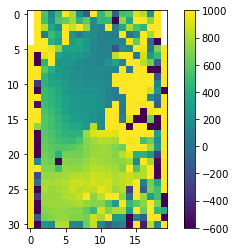

In [28]:
plt.imshow(Ha_vel_map - 0.335 * const.c.to(u.km/u.s).value, vmin=-600, vmax=1000)
plt.colorbar()

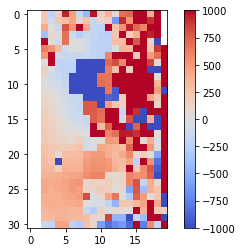

In [33]:
plt.imshow(Ha_vel_map - stellar_vel_map, vmin=-1000, vmax=1000, cmap=cm.coolwarm)
plt.colorbar()

In [ ]:
def plot_stars(prefix, redshift):
    
    plt.close()
    
    cz = const.c.to(u.km/u.s) * redshift

    stellar_hdu = fits.open(f'{prefix}.stellar_table.fits')

    stellar_tab = stellar_hdu[1].data
    stellar_columns = stellar_hdu[1].header

    stellar_x_cor = stellar_tab.field('x_cor')
    stellar_y_cor = stellar_tab.field('y_cor')


    stellar_vel = stellar_tab.field('vel_fit')
    #stellar_vel_err = stellar_tab.field('Halpstellar_vel_err')
    stellar_disp = stellar_tab.field('disp_fit')

    dim = (31,20)

    stellar_vel_map = np.full((dim[0],dim[1]) ,np.nan)
    stellar_disp_map = np.full((dim[0],dim[1]) ,np.nan)
    Ha_fwhm_map = np.full((dim[0],dim[1]) ,np.nan)
    # gas_select = (stellar_vel / stellar_vel_err) > 3.0

    stellar_vel_map[stellar_y_cor,stellar_x_cor] = stellar_vel
    stellar_disp_map[stellar_y_cor,stellar_x_cor] = stellar_disp

    sns.set_style("darkgrid", {'axes.grid' : False})
    
    
#     fig = plt.figure(figsize=(12,8))

    fig, axs = plt.subplots(1,2, figsize=(12,8))



    cmaps = ['magma',sns.color_palette("Spectral", as_cmap=True), 
                sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)]
#     cmap.set_bad('white',1) # Make the NANs white
    ims = [stellar_vel_map-cz.value, stellar_disp_map]
    vmins, vmaxs = [None, None], [None, None]

    for idx, ax in enumerate(axs):
        im = ax.imshow(ims[idx], origin='lower', vmin=vmins[idx], vmax=vmaxs[idx],  
                    cmap=cmaps[idx], interpolation='None')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(im, cax=cax)       
   



#     axs[0].imshow(stellar_vel_map, origin='lower', vmin=0.000001, vmax=0.01,  cmap=cmap, interpolation='None')
#     axs[1].imshow(stellar_disp_map-cz.value, vmin=-500, vmax=500,origin='lower', cmap=sns.color_palette("Spectral", as_cmap=True))
#     axs[2].imshow(Ha_fwhm_map,origin='lower', vmin=0, vmax=500, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    
    

#     #     cbar = plt.colorbar()
# #     cbar.set_label(r"H$\alpha$ Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")


    plt.show()
    

In [7]:
#About my galaxy cluster
name = 'GMOS J1531+3414'
ra = 232.7936938
dec = 34.2404172
radius = Angle(2.5, u.arcsec)

zh  = 0.335 #z selected from Hennawi (2008)
cz = zh * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73)
da = cosmo.angular_diameter_distance(zh)
dl = cosmo.luminosity_distance(zh)

### Compare Spectra in Northern and Southern Nuclei

In [9]:
gmos_path = '/Users/osaseomoruyi/gmos_run/'
gmos_spectrum_file = ''.join((gmos_path, 'Data/integrated_gmos_spectrum.fits'))

In [10]:
gmos_spectrum = fits.open(gmos_spectrum_file)[0]

In [21]:
gmos_hdr = gmos_spectrum.header
num_spectral_elements = np.shape(gmos_spectrum.data.T)[0]

gmos_wave =  (np.arange(num_spectral_elements) - (gmos_hdr['CRPIX1'] - 1)) * gmos_hdr['CDELT1'] + gmos_hdr['CRVAL1']

In [99]:
na_rest = 5894
mg_rest = 5175
ha_rest = 6562.80#6583#62.80
na =  na_rest * (1+zh)
mg =  mg_rest * (1+zh)
ha = ha_rest * (1 + zh)

zstar_obs = 0.3332
mg_obs = mg_rest * (1 + zstar_obs)
na_obs = na_rest * (1 + zstar_obs)
ha_obs = ha_rest * (1 + zstar_obs)


In [100]:
print(mg_obs, na_obs)

6899.3099999999995 7857.8808


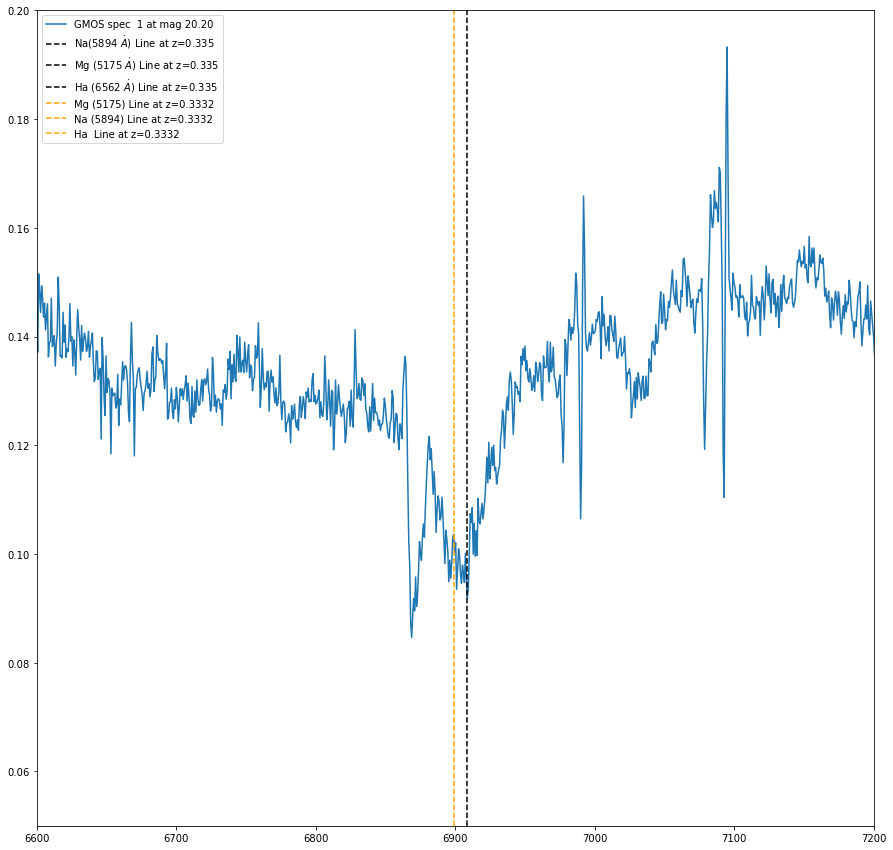

In [104]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(gmos_wave , gmos_spectrum.data, label ='GMOS spec  1 at mag 20.20')
ax.axvline(na, ls = '--', color='k', label = r'Na(5894 $\dot{A}$) Line at z=0.335')
ax.axvline(mg, ls = '--', color='k', label = r'Mg (5175 $\dot{A}$) Line at z=0.335')
ax.axvline(ha, ls = '--', color='k', label = r'Ha (6562 $\dot{A}$) Line at z=0.335')

ax.axvline(mg_obs, ls = '--', color='orange', label = r'Mg (5175) Line at z={}'.format(zstar_obs))
ax.axvline(na_obs, ls = '--', color='orange', label = r'Na (5894) Line at z={}'.format(zstar_obs))
ax.axvline(ha_obs, ls = '--', color='orange', label = r'Ha  Line at z={}'.format(zstar_obs))

ax.set_xlim(6600, 7200)
ax.set_ylim(0.05, 0.2)
ax.legend()

Text(0.5, 0, 'Observed Wavelength ($\\dot{A}$)')

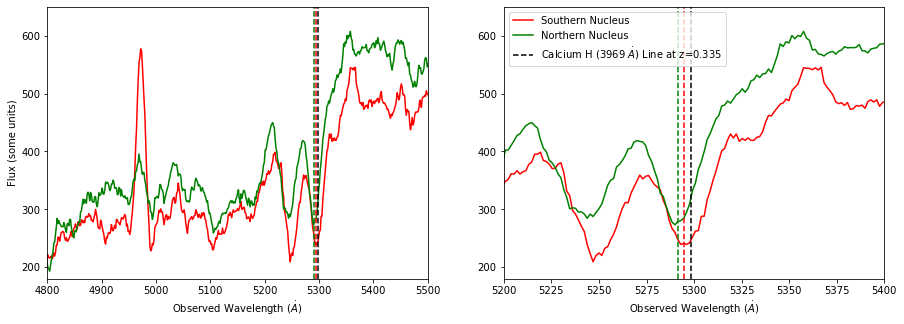

In [36]:
#By eye guess of the redshift

zn = 0.334
zs = 0.3332

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs.ravel()

ax = axs[0]
ax.plot(alfosc_wav[0], alfosc_lower.data, label ='Southern Nucleus', color='r')
ax.plot(alfosc_wav[0], alfosc_upper.data, label ='Northern Nucleus', color='g')
ax.axvline(ca2_h, ls = '--', color='k', label = r'Calcium H (3969 $\dot{A}$) Line at z=0.335')
# ax.axvline(o2_3727, ls = '--', color='r')
ax.axvline(3969 * (1+zn), ls = '--', color='r')
ax.axvline(3969 * (1+zs), ls = '--', color='g')
ax.set_xlim(4800, 5500)
ax.set_ylim(180, 650)
ax.set_ylabel("Flux (some units)")
ax.set_xlabel(r"Observed Wavelength ($\dot{A}$)")

ax = axs[1]
ax.plot(alfosc_wav[0], alfosc_lower.data, label ='Southern Nucleus', color='r')
ax.plot(alfosc_wav[0], alfosc_upper.data, label ='Northern Nucleus', color='g')
ax.axvline(ca2_h, ls = '--', color='k', label = r'Calcium H (3969 $\dot{A}$) Line at z=0.335')
# ax.axvline(o2_3727, ls = '--', color='r')
ax.axvline(3969 * (1+zn), ls = '--', color='r')
ax.axvline(3969 * (1+zs), ls = '--', color='g')
ax.legend()
ax.set_xlim(5200, 5400)
ax.set_ylim(180, 650)
ax.set_xlabel(r"Observed Wavelength ($\dot{A}$)")

Text(0.5, 0, 'Observed Wavelength ($\\dot{A}$)')

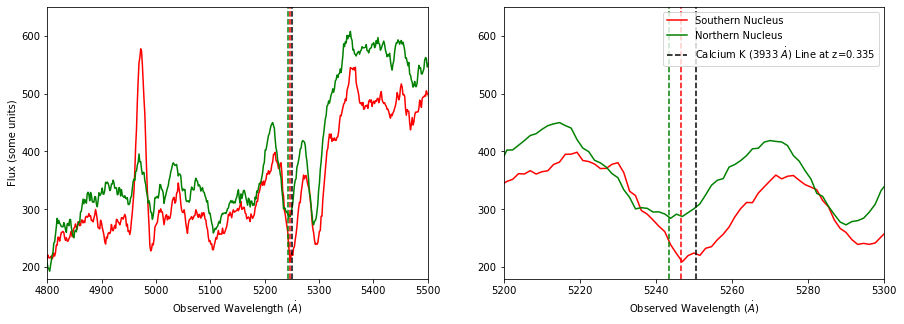

In [37]:
#By eye guess of the redshift

zn = 0.334
zs = 0.3332

fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs.ravel()

ax = axs[0]
ax.plot(alfosc_wav[0], alfosc_lower.data, label ='Southern Nucleus', color='r')
ax.plot(alfosc_wav[0], alfosc_upper.data, label ='Northern Nucleus', color='g')
ax.axvline(ca2_k, ls = '--', color='k', label = r'Calcium K (3933 $\dot{A}$) Line at z=0.335')
# ax.axvline(o2_3727, ls = '--', color='r')
ax.axvline(3933 * (1+zn), ls = '--', color='r')
ax.axvline(3933 * (1+zs), ls = '--', color='g')
ax.set_xlim(4800, 5500)
ax.set_ylim(180, 650)
ax.set_ylabel("Flux (some units)")
ax.set_xlabel(r"Observed Wavelength ($\dot{A}$)")

ax = axs[1]
ax.plot(alfosc_wav[0], alfosc_lower.data, label ='Southern Nucleus', color='r')
ax.plot(alfosc_wav[0], alfosc_upper.data, label ='Northern Nucleus', color='g')
ax.axvline(ca2_k, ls = '--', color='k', label = r'Calcium K (3933 $\dot{A}$) Line at z=0.335')
# ax.axvline(o2_3727, ls = '--', color='r')
ax.axvline(3933 * (1+zn), ls = '--', color='r')
ax.axvline(3933 * (1+zs), ls = '--', color='g')
ax.legend()
ax.set_xlim(5200, 5300)
ax.set_ylim(180, 650)
ax.set_xlabel(r"Observed Wavelength ($\dot{A}$)")

In [276]:
alfosc_wav[0][1050]

5233.060899

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


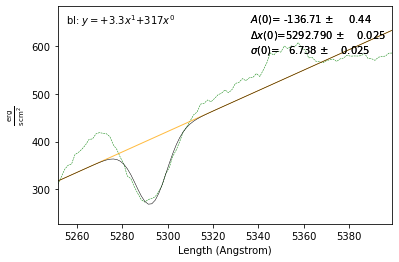

In [32]:
spectrum_range =[5250, 5400]
spectrum_xaxis = alfosc_wav#* u.AA
ids = np.where((spectrum_xaxis[0] > spectrum_range[0]) & (spectrum_xaxis[0] < spectrum_range[1]))
data_xaxis = spectrum_xaxis[0].iloc[ids]
spectrum = alfosc_upper.data 
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
guesses= [-210, 3969 * (1+zh), 15]
xminval, xmaxval = [None, None]

sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='g')
sp.baseline(subtract=False)
sp.specfit(fittype='gaussian', negamp=True, color='k')



In [19]:
zn = (5292.79/3969) - 1
zn

0.3335323759133282

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


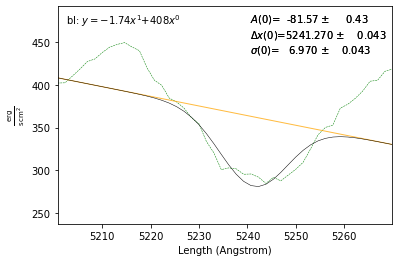

In [33]:
spectrum_range =[5200, 5270]
spectrum_xaxis = alfosc_wav#* u.AA
ids = np.where((spectrum_xaxis[0] > spectrum_range[0]) & (spectrum_xaxis[0] < spectrum_range[1]))
data_xaxis = spectrum_xaxis[0].iloc[ids]
spectrum = alfosc_upper.data 
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
guesses= [-210, 3933 * (1+zh), 15]
xminval, xmaxval = [None, None]

sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='g')
sp.baseline(subtract=False)
sp.specfit(fittype='gaussian', negamp=True, color='k')



In [60]:
zn2 = (5241.27/3933) - 1
zn2

0.3326392067124333

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


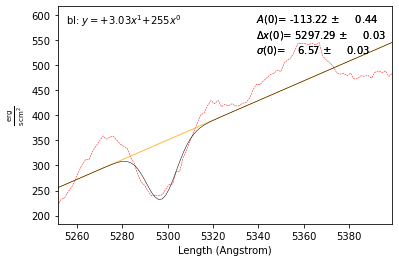

In [38]:
spectrum_range =[5250, 5400]
spectrum_xaxis = alfosc_wav#* u.AA
ids = np.where((spectrum_xaxis[0] > spectrum_range[0]) & (spectrum_xaxis[0] < spectrum_range[1]))
data_xaxis = spectrum_xaxis[0].iloc[ids]
spectrum = alfosc_lower.data 
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
xminval, xmaxval = [None, None]
sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='r')
sp.baseline(subtract=False)
sp.specfit(fittype='gaussian', negamp=True, color='k')

In [21]:
zs = (5297.29/3969) - 1
zs

0.33466616276140093

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


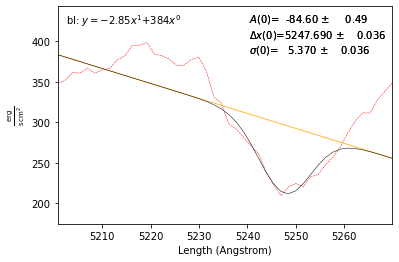

In [39]:
spectrum_range =[5200, 5270]
spectrum_xaxis = alfosc_wav#* u.AA
ids = np.where((spectrum_xaxis[0] > spectrum_range[0]) & (spectrum_xaxis[0] < spectrum_range[1]))
data_xaxis = spectrum_xaxis[0].iloc[ids]
spectrum = alfosc_lower.data 
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
xminval, xmaxval = [None, None]
sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='r')
sp.baseline(subtract=False)
sp.specfit(fittype='gaussian', negamp=True, color='k')

In [62]:
zs2 = (5247.69/3933) - 1
zs2

0.33427154843630813

In [68]:
np.mean([zn, zn2]), np.mean([zs, zs2])

(0.33308579131288074, 0.33446885559885453)

In [6]:
0.34* const.c.to(u.km/u.s) - 0.328* const.c.to(u.km/u.s)

<Quantity 3597.509496 km / s>

In [67]:
0.3353* const.c.to(u.km/u.s) - 0.3345* const.c.to(u.km/u.s)

<Quantity 239.8339664 km / s>

In [15]:
(0.335* const.c.to(u.km/u.s) + 600 * (u.km/u.s)) - (0.3353* const.c.to(u.km/u.s))

<Quantity 510.0622626 km / s>

In [18]:
(50 * u.kpc /(150 * (u.km/u.s))).to(u.yr)

<Quantity 3.25930741e+08 yr>

In [19]:
(0.335* const.c.to(u.km/u.s) + 600 * (u.km/u.s))/ const.c.to(u.km/u.s)

<Quantity 0.33700138>

### Cluster Redshifts

In [40]:
table_path = path_to_beads + 'Analysis/tables/'

In [50]:
galaxies_table = np.loadtxt(table_path + 'apjs380374t4_mrt.txt', skiprows=354, max_rows=17, 
                 dtype={'names': ('telescope', 'cluster', 'label', 'RAh', 'RAm', 'RAs', 'DEd', 'DEm', 'DEs', 'z', 'zclass'),
                     'formats': ('<U16', '<U16', '<U16', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4')})

In [56]:
idg = np.where(galaxies_table['label'] == 'gal')[0]
zgals = galaxies_table['z'][idg]

savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6


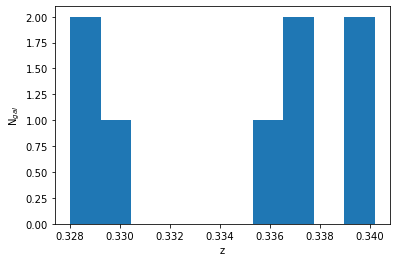

In [58]:
plt.hist(zgals)
plt.xlabel('z')
plt.ylabel('N$_{gal}$')

plt.savefig(fig_path + 'HST_galaxies_z.pdf', overwrite=True)

In [45]:
b11

,0
0,SDSS J0851+3331 A1 08 51 37.108 +33 31 13.5...
1,SDSS J0851+3331 A2 08 51 37.115 +33 31 06.5...
2,SDSS J0851+3331 A3 08 51 39.363 +33 31 27.0...
3,SDSS J0851+3331 B1 08 51 37.987 +33 31 06.8...
4,SDSS J0851+3331 B2 08 51 38.021 +33 31 03.1...
...,...
400,SDSS J2243-0935 gal 22 43 20.718 -09 35 19.8...
401,SDSS J2243-0935 gal 22 43 23.210 -09 35 48.5...
402,SDSS J2243-0935 gal 22 43 19.303 -09 35 54.0...
403,SDSS J2243-0935 gal 22 43 24.131 -09 36 10.5...
